#**Contract Obligation Extraction**


# Domain:Legal and Compliance
## Project Overview
This project automates the extraction of enforceable obligations from legal contracts using AI.
It leverages text, structured sections, and optional audio modalities to identify obligations, assign risk levels,
and generate structured JSON outputs for compliance monitoring, dashboards, or audit purposes.


# Problem Statement & Domain Challenges
Organizations must manage numerous contracts containing complex obligations. Manual review is:
- Time-consuming
- Inconsistent across contracts
- Error-prone, especially for multi-party or multi-clause agreements

**Challenges:**
- Identifying mandatory vs optional clauses
- Extracting obligations with clarity on parties, actions, and deadlines
- Handling audio or multi-modal inputs
- Producing structured outputs suitable for automated systems


# AI Models & Techniques
- **Models Used:**
  - `gpt-4.1-nano` → step-by-step obligation reasoning, JSON output
  - `gemini-2.5-flash` → text-based risk analysis (optional)
  - `gpt-4o-mini-tts` → optional text-to-speech review
  - `whisper-1` → optional transcription of audio contracts

- **Prompting Techniques:**
  - One-Shot Prompting + CoT reasoning + Visual markers (Template 1)
  - Few-Shot Prompting with optional TTS (Template 2)
  - Step-by-Step Chain-of-Thought with structured JSON and risk scoring (Template 3)


# Features & Capabilities
- Extract enforceable obligations with clear party, action, and deadlines
- Optional risk assessment (Low / Medium / High) with concise reasoning
- Highlight obligations visually using [OBLIGATION] markers
- Handle text-only, few-shot, or multi-modal audio inputs
- Structured JSON output for automation or dashboards
- Optional text-to-speech playback for compliance review
- Consistent and scalable multi-contract analysis


# Data Flow Architecture
1. Input: Contract text or audio file
2. Processing:
   - Template 1: One-shot + CoT + Visual markers → JSON
   - Template 2: Few-shot + Optional TTS → Risk scoring
   - Template 3: Step-by-Step CoT + JSON + Decision Tree Generation
3. Output:
   - Structured JSON of obligations
   - Section summary, obligated party, actions, deadlines, and risk
   - Optional audio playback of policy/contract text
4. Integration:
   - Compliance dashboards, reports, or audit tracking


**Use Case Description:**
Extract enforceable obligations from a contract using one annotated example with step-by-step reasoning and visual cues.
Generates structured JSON for downstream compliance tasks.

**Prompt Template 1:**
- Section-by-section analysis
- Identify mandatory obligations
- Visual marker
- JSON output with party, action, deadline, and section reference

In [ ]:
# --------------------------------------------
# Task 3 - Template 1 (Enhanced Hybrid)
# Obligation Extraction from Contracts
# Technique: One-Shot + Chain-of-Thought (CoT) + Visual Cues + JSON Output
# --------------------------------------------

from openai import OpenAI
import json

# -------------------------------
# Initialize client (Navigate Labs Gateway)
# -------------------------------
client = OpenAI(
    api_key="sk-WBoo8SDKWQv1bkB4cUZQLw",  # Replace with your OpenAI key
    base_url="https://apidev.navigatelabsai.com"
)

# -------------------------------
# Sample contract text
# -------------------------------
contract_text = """
1. DEFINITIONS
For the purpose of this Agreement, "Services" means the tasks described herein.

2. PAYMENT OBLIGATIONS
2.1 The Client shall pay all invoices within 30 days of receipt.
2.2 Late payments may incur interest as permitted by law.

3. CONFIDENTIALITY
3.1 The Vendor shall maintain the confidentiality of all proprietary information
    disclosed during the term of this Agreement.

4. TERMINATION
Either party may terminate this Agreement with written notice.
"""

# -------------------------------
# Function: Hybrid Obligation Extraction
# -------------------------------
def extract_obligations_hybrid(contract_text):
    """
    Extract enforceable obligations from a contract using:
    - Text + Section Structure
    - Visual markers [OBLIGATION]
    - Step-by-step reasoning (CoT)
    - Outputs structured JSON for further processing
    """

    prompt = f"""
You are a senior legal contract analyst.

Step-by-Step Instructions:
1. Read the contract section by section.
2. Identify enforceable obligations in numbered clauses.
3. Highlight obligations using [OBLIGATION] markers for clarity.
4. For each obligation, think step by step:
   - Who is obligated? (party)
   - What action must they perform?
   - What is the condition, deadline, or duration?
5. Ignore definitions, optional language, and general statements.
6. Present each obligation in JSON format as below:

Example Output:
[
  {{
    "party": "Vendor",
    "action": "Maintain confidentiality of proprietary information",
    "deadline": "Term of the Agreement",
    "section": "3.1 CONFIDENTIALITY"
  }}
]

Contract Text:
{contract_text}

Instructions:
- Extract only mandatory obligations.
- Normalize actions clearly.
- Include section/number if possible.
"""

    response = client.chat.completions.create(
        model="gpt-4.1-nano",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.1
    )

    return response.choices[0].message.content


# -------------------------------
# Run extraction and parse JSON
# -------------------------------
output_text = extract_obligations_hybrid(contract_text)

try:
    obligations_json = json.loads(output_text)
except:
    # fallback: return raw output if JSON parsing fails
    obligations_json = output_text

print("HYBRID EXTRACTED OBLIGATIONS (JSON / Structured):\n")
print(json.dumps(obligations_json, indent=2))


##Sample Input

In [ ]:
contract_text = """
1. DEFINITIONS
For the purpose of this Agreement, "Services" means the tasks described herein.

2. PAYMENT OBLIGATIONS
2.1 The Client shall pay all invoices within 30 days of receipt.
2.2 Late payments may incur interest as permitted by law.

3. CONFIDENTIALITY
3.1 The Vendor shall maintain the confidentiality of all proprietary information
    disclosed during the term of this Agreement.

4. TERMINATION
Either party may terminate this Agreement with written notice.
"""

##Sample Output

In [ ]:
HYBRID EXTRACTED OBLIGATIONS (JSON / Structured):

[
  {
    "party": "Client",
    "action": "Pay all invoices",
    "deadline": "Within 30 days of receipt",
    "section": "2.1 PAYMENT OBLIGATIONS"
  },
  {
    "party": "Vendor",
    "action": "Maintain the confidentiality of all proprietary information disclosed during the term of this Agreement",
    "deadline": "During the term of this Agreement",
    "section": "3.1 CONFIDENTIALITY"
  }
]

**Use Case Description:**
Evaluate internal policy clauses for legal/regulatory risk using few-shot examples and optionally generate audio for review.

**Prompt Template 2:**
- Few-shot annotated examples with Risk Level & Score
- Identify risky statements only
- Output in structured format: Section Summary | Risk Level | Risk Score | Reason
- Optional TTS conversion for review


In [ ]:
# --------------------------------------------
# Task 3 - Template 2
# Policy Liability Hotspot Detection
# Technique: Few-Shot Prompting + Risk Scoring + TTS
# Modality: Text +  Audio (TTS)
# --------------------------------------------

from openai import OpenAI
from IPython.display import Audio, display
import io

# -------------------------------
# Initialize client (Navigate Labs Gateway)
# -------------------------------
client = OpenAI(
    api_key="sk-WBoo8SDKWQv1bkB4cUZQLw",  # Replace with your key
    base_url="https://apidev.navigatelabsai.com"
)

# -------------------------------
# Sample policy text
# -------------------------------
policy_text = """
Employees must store all client data locally without encryption.
All security incidents should be reported when feasible.
The organization aims to comply with applicable laws.
"""

# -------------------------------
# Function: Policy Risk Scoring (Few-Shot)
# -------------------------------
def policy_liability_few_shot_multimodal(policy_text):
    """
    Evaluate legal risk for internal policies using Few-Shot Prompting.
    Optionally converts text to audio for TTS-based review.
    """

    # -------------------------------
    # Few-shot text prompt for risk scoring
    # -------------------------------
    prompt = f"""
You are a senior legal compliance analyst.

Few-Shot Examples:

Example 1:
Policy Statement: "Employees may access all customer data without restriction."
Risk Level: High
Risk Score: 90
Reason: Unrestricted access violates data minimization and access control requirements.

Example 2:
Policy Statement: "The organization aims to comply with applicable laws."
Risk Level: Low
Risk Score: 20
Reason: Aspirational language without enforceable commitment.

Example 3:
Policy Statement: "Security incidents should be reported when feasible."
Risk Level: Medium
Risk Score: 55
Reason: Ambiguous reporting timelines may fail regulatory expectations.

Now evaluate the following internal policy:

Policy Text:
{policy_text}

Instructions:
- Identify only policy statements that introduce legal or regulatory risk.
- Assign a Risk Level (Low / Medium / High).
- Assign a Risk Score from 0 to 100.
- Provide a concise reason.

Output Format:
Section Summary | Risk Level | Risk Score | Reason
"""

    response = client.chat.completions.create(
        model="gpt-4.1-nano",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.15
    )

    risk_output = response.choices[0].message.content

    # -------------------------------
    # Optional: Convert policy text to audio for review
    # -------------------------------
    audio_bytes = b""
    with client.audio.speech.with_streaming_response.create(
        model="gpt-4o-mini-tts",
        voice="alloy",
        input=policy_text
    ) as tts_response:
        for chunk in tts_response.iter_bytes():
            audio_bytes += chunk

    display(Audio(audio_bytes, autoplay=True))

    return risk_output

# -------------------------------
# Run Policy Risk Scoring
# -------------------------------
output = policy_liability_few_shot_multimodal(policy_text)

print("POLICY LIABILITY RISK OUTPUT:\n")
print(output)


POLICY LIABILITY RISK OUTPUT:

Employees must store all client data locally without encryption. | High | 85 | Storing client data unencrypted significantly breaches data protection and confidentiality requirements, increasing risk of data breaches and regulatory penalties.

All security incidents should be reported when feasible. | Medium | 55 | Ambiguous reporting timelines may lead to non-compliance with incident reporting obligations, but the statement is somewhat flexible.

The organization aims to comply with applicable laws. | Low | 20 | Aspirational language without enforceable commitments; minimal immediate legal risk.


##Sample Input


In [ ]:
policy_text = """
Employees must store all client data locally without encryption.
All security incidents should be reported when feasible.
The organization aims to comply with applicable laws.
"""

##Sample Output

POLICY LIABILITY RISK OUTPUT:

Employees must store all client data locally without encryption. | High | 85 | Storing client data unencrypted significantly breaches data protection and confidentiality requirements, increasing risk of data breaches and regulatory penalties.

All security incidents should be reported when feasible. | Medium | 55 | Ambiguous reporting timelines may lead to non-compliance with incident reporting obligations, but the statement is somewhat flexible.

The organization aims to comply with applicable laws. | Low | 20 | Aspirational language without enforceable commitments; minimal immediate legal risk.


**Use Case Description:**
Regulatory Applicability Analysis Using Tree-of-Thought (ToT)

In regulatory and compliance domains, organizations often face difficulty determining which rules apply to a product, service, or client scenario. Regulations are conditional, overlapping, and context-dependent, making manual analysis error-prone and slow.

This use case demonstrates how Tree-of-Thought (ToT) reasoning enables an AI system to evaluate multiple applicability paths before reaching a final decision. Instead of producing a single linear answer, the model explores all possible decision branches, documenting why each rule applies or does not apply.

The system:

Parses regulatory rules

Identifies conditions for each rule

Evaluates applicability across multiple decision paths

Produces structured JSON reasoning

Generates a visual decision tree to improve explainability for auditors, legal teams, and stakeholders
**Prompt Template 3:**
- Read each clause carefully
- Identify Obligated Party, Action, Deadline/Condition
- Optional Risk Level with reason
- **Visual markers** for clarity
- Structured JSON output


In [ ]:
# --------------------------------------------
# Task 3- Template 3
# Regulation Applicability Evaluation
# Technique: Tree-of-Thought (ToT)
# Modality: Text Reasoning + Image Visualization
# Output: Structured JSON + Decision Tree Diagram
# --------------------------------------------

from openai import OpenAI
from IPython.display import Image, display
import json

# -------------------------------
# Initialize client
# -------------------------------
client = OpenAI(
    api_key="sk-WBoo8SDKWQv1bkB4cUZQLw",  # Replace with your key
    base_url="https://apidev.navigatelabsai.com"
)

# -------------------------------
# Sample regulation / applicability text
# -------------------------------
regulation_text = """
Rule 1: If a product contains chemical X, it must be labeled as hazardous.
Rule 2: If the product is sold internationally, comply with local safety regulations.
Rule 3: If the client is a retailer, provide safety datasheets.
"""

# -------------------------------
# Function: ToT reasoning + image generation
# -------------------------------
def generate_tot_image(reg_text):
    # Step 1: JSON reasoning
    prompt_tot = f"""
You are a senior regulatory compliance analyst.

Task:
1. Evaluate all possible applicability paths for these regulations.
2. Think step-by-step (Tree-of-Thought) and produce structured JSON with:
   - rule
   - condition
   - applicable (Yes/No)
   - reasoning_path

Regulations:
{reg_text}

JSON Output Format:
[
  {{
    "rule": "Rule 1",
    "condition": "Contains chemical X",
    "applicable": "Yes",
    "reasoning_path": "If product contains X → hazardous labeling required"
  }}
]
"""
    response_tot = client.chat.completions.create(
        model="gpt-4.1-nano",
        messages=[{"role": "user", "content": prompt_tot}],
        temperature=0.1
    )
    tot_json = json.loads(response_tot.choices[0].message.content)

    # Step 2: Create textual tree description
    tree_description = "Decision tree of regulatory applicability:\n"
    for node in tot_json:
        tree_description += f"{node['rule']} → Condition: {node['condition']} → Applicable: {node['applicable']}\n"

    # Step 3: Generate image
    prompt_image = f"Generate a clean, professional decision tree diagram based on the following text:\n{tree_description}"
    image_response = client.images.generate(
        model="imagen-4.0-fast-generate-001",
        prompt=prompt_image,
        size="1024x1024"
    )

    image_url = image_response.data[0].url
    display(Image(url=image_url))

    return tot_json, image_url

# -------------------------------
# Run ToT + Image Generation
# -------------------------------
tot_result, tree_image_url = generate_tot_image(regulation_text)

print("TREE-OF-THOUGHT JSON OUTPUT:\n")
print(json.dumps(tot_result, indent=2))
print("\nDecision Tree Image URL:\n", tree_image_url)


##Sample Input


In [ ]:
Rule 1 → Condition: Contains chemical X → Applicable: Yes
Rule 2 → Condition: Product sold internationally → Applicable: Yes
Rule 3 → Condition: Client is a retailer → Applicable: Yes


##Sample Output


In [ ]:
[
  {
    "rule": "Rule 1",
    "condition": "Product contains chemical X",
    "applicable": "Yes",
    "reasoning_path": "If chemical X is present → hazardous labeling required"
  },
  {
    "rule": "Rule 2",
    "condition": "Product sold internationally",
    "applicable": "Yes",
    "reasoning_path": "International sale → comply with local safety regulations"
  },
  {
    "rule": "Rule 3",
    "condition": "Client is a retailer",
    "applicable": "No",
    "reasoning_path": "Client is not a retailer → no datasheet obligation"
  }
]


Image of Decision Tree

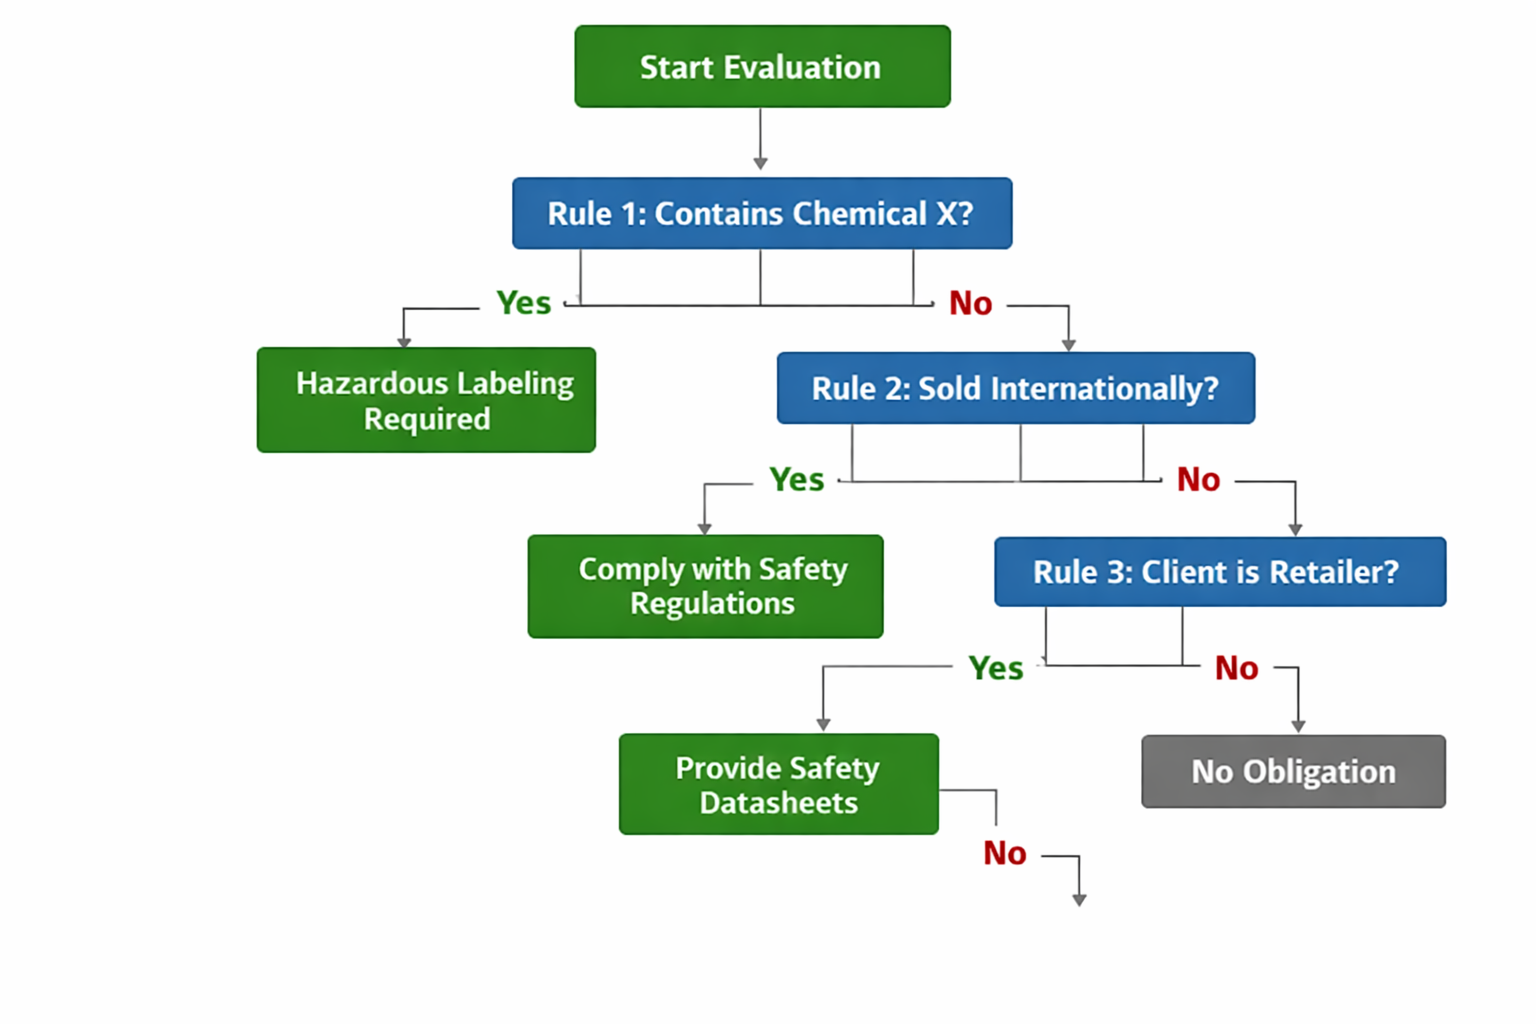

# Summary & Reusability
- Templates provide modular pipelines for text and audio contract/policy analysis.
- One-Shot (Template 1) is ideal for rapid extraction; Few-Shot (Template 2) ensures calibrated risk scoring; Step-by-Step CoT (Template 3) provides detailed JSON and risk annotations.
- Multi-modal support (audio → transcription → analysis) enhances flexibility.
- Outputs are structured for dashboards, automated compliance alerts, or audit trails.
- Scalable across multiple contracts, policies, and regulatory frameworks with minimal modification.
